In [1]:
import matplotlib.font_manager as font_manager
import matplotlib.dates as matdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns


sns.set_style("ticks")
fontpath = expanduser('LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': False
}
mpl.rcParams.update(params)

In [2]:
from datetime import datetime, timedelta
from os.path import expanduser
import pandas as pd
import numpy as np

cats = ["Alt-right", "Alt-lite", "I.D.W.", "Media"]
names = ["Alt-right", "Alt-lite", "IDW", "control"]
colors = {"Alt-right": "#f93e49", "Alt-lite": "#F29F05", "I.D.W.": "#019441", "Media": "#35598a"}
x_label = ["1", "2-3", "4-9", "10+"]
years = ["2016", "2017", "2018"]
lines = ['-', '--', '-.', ':']
df_path = "./../data/sentiment/dataframes/"
img_path = "./../imgs/"

In [3]:
def human_format(num, pos=None):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

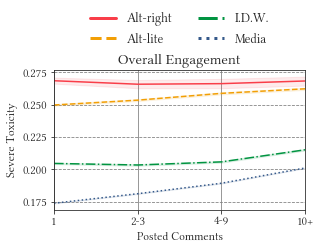

In [19]:
attributes = ['SEVERE_TOXICITY']
persp_df_path = df_path + "perspective_df/engagement/"
perspective = []

fig = plt.figure(
    constrained_layout=False,
    figsize=(4.5, 2.5),
)
gs = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.45, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])

axs = [ax1]

# Plots cdfs on the top plots
for ax, year in zip(axs, range(len(years))):
    for emotion in attributes:
        for i in range(len(names)):
            perspective = pd.read_csv(f"{persp_df_path}{names[i]}_perspective_engagement.csv")
            x = x_label
            y = perspective[emotion]
            y_dyd = perspective[emotion + "_dyd"]
            y_dyu = perspective[emotion + "_dyu"]

            ax.plot(x, y, lines[i], color=colors[cats[i]])
            ax.fill_between(x, y_dyd,y_dyu, alpha=0.1, color=colors[cats[i]])

    
    # Sets ticks, titles and limits
    ax.set_title("Overall Engagement", fontsize=15)
    ax.set_xlim(0, 3)
    
for ax in axs[1:]:
    ax.yaxis.set_tick_params(labelbottom=False)
    
# Adds legend on the top
leg = ax1.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.5),
           ncol=2,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=13)


for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Severe Toxicity")
_ = ax1.set_xlabel("Posted Comments")

# Saves figs
plt.savefig(f"{img_path}perspective/engagement/perspective_engagement.pdf", bbox_inches = 'tight')       
plt.savefig(f"{img_path}perspective/engagement/perspective_engagement.png", bbox_inches = 'tight')       


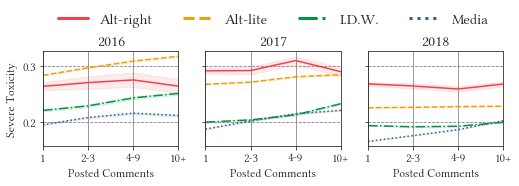

In [4]:
attributes = ['SEVERE_TOXICITY']
persp_df_path = df_path + "perspective_df/engagement/"
perspective = []

fig = plt.figure(
    constrained_layout=False,
    figsize=(8.25, 1.7),
)
gs = fig.add_gridspec(nrows=1, ncols=3, wspace=0.2, hspace=0.45, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharey=ax1)

axs = [ax1, ax2, ax3]

# Plots cdfs on the top plots
for ax, year in zip(axs, years):
    for emotion in attributes:
        for i in range(len(names)):
            perspective = pd.read_csv(f"{persp_df_path}{names[i]}_{year}_perspective_engagement.csv")
            x = x_label
            y = perspective[emotion]
            y_dyd = perspective[emotion + "_dyd"]
            y_dyu = perspective[emotion + "_dyu"]

            ax.plot(x, y, lines[i], color=colors[cats[i]])
            ax.fill_between(x, y_dyd,y_dyu, alpha=0.1, color=colors[cats[i]])

    
    # Sets ticks, titles and limits
    ax.set_title(year, fontsize=15)
    ax.set_xlim(0, 3)
    
for ax in axs[1:]:
    ax.yaxis.set_tick_params(labelbottom=False)
    
# Adds legend on the top
leg = ax2.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.55),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=15)


for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Severe Toxicity")
_ = ax1.set_xlabel("Posted Comments")
_ = ax2.set_xlabel("Posted Comments")
_ = ax3.set_xlabel("Posted Comments")


# Saves figs
plt.savefig(f"{img_path}perspective/engagement/perspective_engagement_years.pdf", bbox_inches = 'tight')       
plt.savefig(f"{img_path}perspective/engagement/perspective_engagement_years.png", bbox_inches = 'tight')       


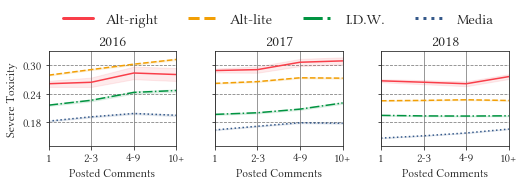

In [10]:
attributes = ['SEVERE_TOXICITY']
persp_df_path = df_path + "perspective_df/engagement/"
perspective = []

fig = plt.figure(
    constrained_layout=False,
    figsize=(8.25, 1.7),
)
gs = fig.add_gridspec(nrows=1, ncols=3, wspace=0.3, hspace=0.45, top=0.90)

# adds subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharey=ax1)

axs = [ax1, ax2, ax3]

# Plots cdfs on the top plots
for ax, year in zip(axs, years):
    for emotion in attributes:
        for i in range(len(names)):
            perspective = pd.read_csv(f"{persp_df_path}{names[i]}_{year}_perspective_engagement_all.csv")
            x = x_label
            y = perspective[emotion]
            y_dyd = perspective[emotion + "_dyd"]
            y_dyu = perspective[emotion + "_dyu"]

            ax.plot(x, y, lines[i], color=colors[cats[i]])
            ax.fill_between(x, y_dyd,y_dyu, alpha=0.1, color=colors[cats[i]])

    
    # Sets ticks, titles and limits
    ax.set_title(year, fontsize=15)
    ax.set_xlim(0, 3)
    ax.set_ylim(0.13, 0.33)
    ax.set_yticks([0.18, 0.24, 0.30])    
    
for ax in axs[1:]:
    ax.yaxis.set_tick_params(labelbottom=False)
    
# Adds legend on the top
leg = ax2.legend(cats,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.55),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=15)


for line in leg.get_lines():
    line.set_linewidth(3.0)

# Common axis config, grids, etc
for ax in axs:
    ax.xaxis.grid(color='gray', linestyle='solid')
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adds labels
_ = ax1.set_ylabel("Severe Toxicity")
_ = ax1.set_xlabel("Posted Comments")
_ = ax2.set_xlabel("Posted Comments")
_ = ax3.set_xlabel("Posted Comments")


# Saves figs
plt.savefig(f"{img_path}perspective/engagement/perspective_engagement_years_all.pdf", bbox_inches = 'tight')       
plt.savefig(f"{img_path}perspective/engagement/perspective_engagement_years_all.png", bbox_inches = 'tight')       
